CODE BLOCK: 1

In [1]:
import torch
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [3]:
# Train data transformations
def GetTrain_Transforms():
    train_transforms = transforms.Compose([
        transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
        transforms.Resize((28, 28)),
        transforms.RandomRotation((-15., 15.), fill=0),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
        ])

# Test data transformations
    test_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    return train_transforms,test_transforms

CODE BLOCK: 4

In [4]:
train_transforms, test_transforms = GetTrain_Transforms()
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 106226602.43it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 93685764.75it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 30362153.82it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18353110.57it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [5]:
batch_size = 512
def GetLoadersValues(batch_size, shuffle = True, num_workers = 2, pin_memory = True):
    kwargs = {'batch_size': batch_size, 'shuffle': shuffle, 'num_workers': num_workers, 'pin_memory': pin_memory}

    test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
    train_loader = torch.utils.data.DataLoader(test_data, **kwargs)
    return test_loader, train_loader

CODE BLOCK: 6

In [6]:

test_loader, train_loader = GetLoadersValues(batch_size, shuffle = True, num_workers = 2, pin_memory = True)
batch_data, batch_label = next(iter(train_loader))
import matplotlib.pyplot as plt

def GetImageShow():
    fig = plt.figure()

    for i in range(12):
      plt.subplot(3,4,i+1)
      plt.tight_layout()
      plt.imshow(batch_data[i].squeeze(0), cmap='gray')
      plt.title(batch_label[i].item())
      plt.xticks([])
      plt.yticks([])

In [7]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [8]:
from __future__ import print_function
BASE_DIR='/content/drive/MyDrive/AssignmentsERA2'
%cd $BASE_DIR

/content/drive/MyDrive/AssignmentsERA2


CODE BLOCK: 7

In [9]:

import model as M

CODE BLOCK: 8

In [10]:
# Data to plot accuracy and loss graphs
def InitializeValues():
  train_losses = []
  test_losses = []
  train_acc = []
  test_acc = []

  test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}
  return train_losses, test_losses , train_acc, test_acc

CODE BLOCK: 9

In [11]:
import utils as U


CODE BLOCK: 10

In [12]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = M.Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [13]:
import torch.optim as optim
train_losses, test_losses , train_acc, test_acc = InitializeValues()
model = M.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss()
criterion = M.F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  U.train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
  U.test(model, device, test_loader, criterion, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.2830 Batch_id=19 Accuracy=10.35: 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]


Test set: Average loss: 2.2875, Accuracy: 6500/60000 (10.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.1893 Batch_id=19 Accuracy=19.31: 100%|██████████| 20/20 [00:02<00:00,  8.99it/s]


Test set: Average loss: 2.1856, Accuracy: 19648/60000 (32.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=5.4313 Batch_id=19 Accuracy=53.51: 100%|██████████| 20/20 [00:03<00:00,  6.10it/s]


Test set: Average loss: 2.7473, Accuracy: 17630/60000 (29.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=2.2733 Batch_id=19 Accuracy=24.17: 100%|██████████| 20/20 [00:02<00:00,  9.48it/s]


Test set: Average loss: 2.2713, Accuracy: 14646/60000 (24.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=2.1742 Batch_id=19 Accuracy=27.30: 100%|██████████| 20/20 [00:03<00:00,  6.39it/s]


Test set: Average loss: 2.1588, Accuracy: 18806/60000 (31.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=1.3385 Batch_id=19 Accuracy=43.80: 100%|██████████| 20/20 [00:02<00:00,  9.04it/s]


Test set: Average loss: 1.3195, Accuracy: 34868/60000 (58.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.8335 Batch_id=19 Accuracy=71.59: 100%|██████████| 20/20 [00:02<00:00,  9.27it/s]


Test set: Average loss: 0.7692, Accuracy: 45861/60000 (76.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.2243 Batch_id=19 Accuracy=87.74: 100%|██████████| 20/20 [00:02<00:00,  8.61it/s]


Test set: Average loss: 0.4815, Accuracy: 51481/60000 (85.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.2956 Batch_id=19 Accuracy=92.68: 100%|██████████| 20/20 [00:02<00:00,  9.44it/s]


Test set: Average loss: 0.3596, Accuracy: 53523/60000 (89.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.1629 Batch_id=19 Accuracy=95.00: 100%|██████████| 20/20 [00:02<00:00,  7.51it/s]


Test set: Average loss: 0.3152, Accuracy: 54317/60000 (90.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0811 Batch_id=19 Accuracy=95.95: 100%|██████████| 20/20 [00:02<00:00,  9.46it/s]


Test set: Average loss: 0.2514, Accuracy: 55382/60000 (92.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1341 Batch_id=19 Accuracy=96.71: 100%|██████████| 20/20 [00:02<00:00,  6.89it/s]


Test set: Average loss: 0.2244, Accuracy: 55933/60000 (93.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0924 Batch_id=19 Accuracy=97.36: 100%|██████████| 20/20 [00:02<00:00,  9.04it/s]


Test set: Average loss: 0.2218, Accuracy: 55973/60000 (93.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0598 Batch_id=19 Accuracy=97.47: 100%|██████████| 20/20 [00:03<00:00,  6.26it/s]


Test set: Average loss: 0.2228, Accuracy: 56043/60000 (93.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0730 Batch_id=19 Accuracy=97.81: 100%|██████████| 20/20 [00:02<00:00,  9.30it/s]


Test set: Average loss: 0.2007, Accuracy: 56471/60000 (94.12%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.1104 Batch_id=19 Accuracy=98.35: 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]


Test set: Average loss: 0.1905, Accuracy: 56567/60000 (94.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0505 Batch_id=19 Accuracy=98.32: 100%|██████████| 20/20 [00:02<00:00,  7.69it/s]


Test set: Average loss: 0.1840, Accuracy: 56675/60000 (94.46%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0702 Batch_id=19 Accuracy=98.36: 100%|██████████| 20/20 [00:02<00:00,  9.22it/s]


Test set: Average loss: 0.1905, Accuracy: 56582/60000 (94.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0561 Batch_id=19 Accuracy=98.40: 100%|██████████| 20/20 [00:03<00:00,  5.65it/s]


Test set: Average loss: 0.1928, Accuracy: 56599/60000 (94.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0534 Batch_id=19 Accuracy=98.46: 100%|██████████| 20/20 [00:02<00:00,  9.58it/s]


Test set: Average loss: 0.1899, Accuracy: 56593/60000 (94.32%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

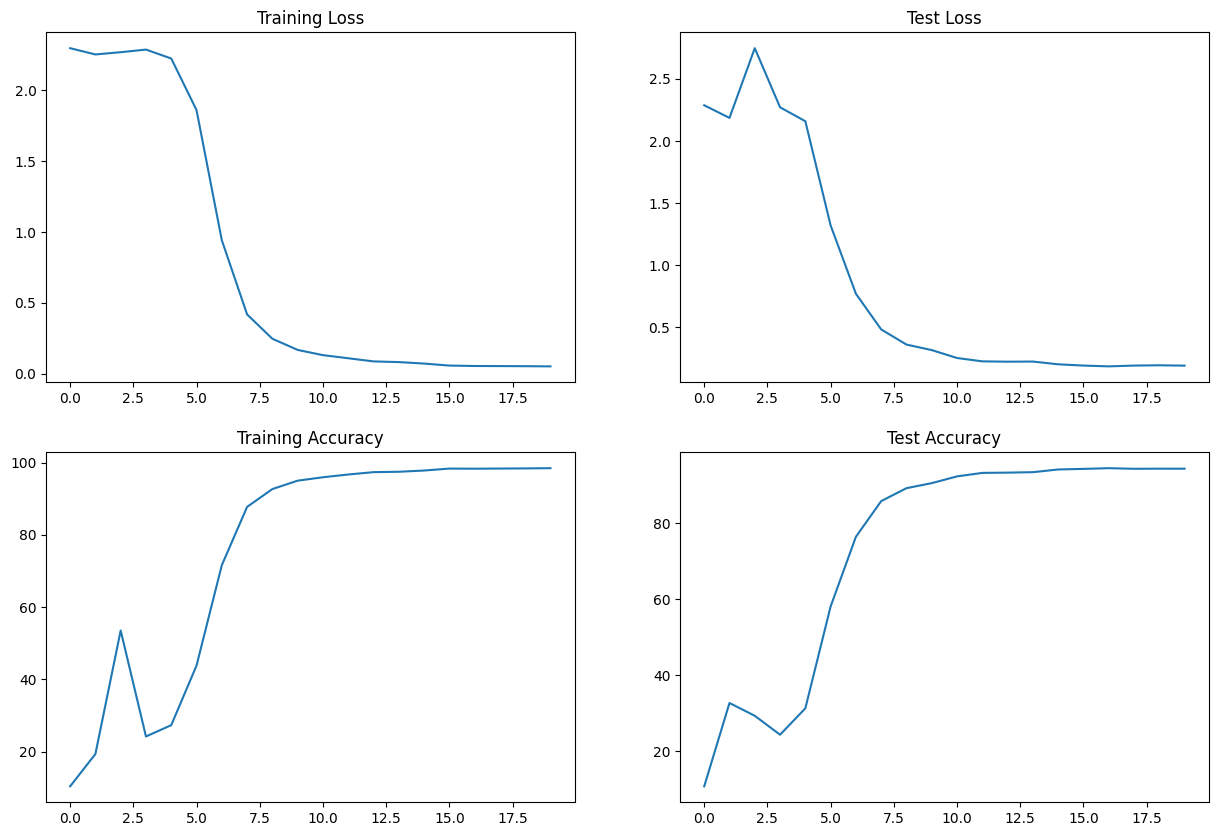

In [14]:
import matplotlib.pyplot as plt
U.PlotTrainTestLossGraph(train_losses, train_acc, test_losses, test_acc )


In [15]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = M.Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
